# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

# 1. Решающие деревья. Визуализация.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

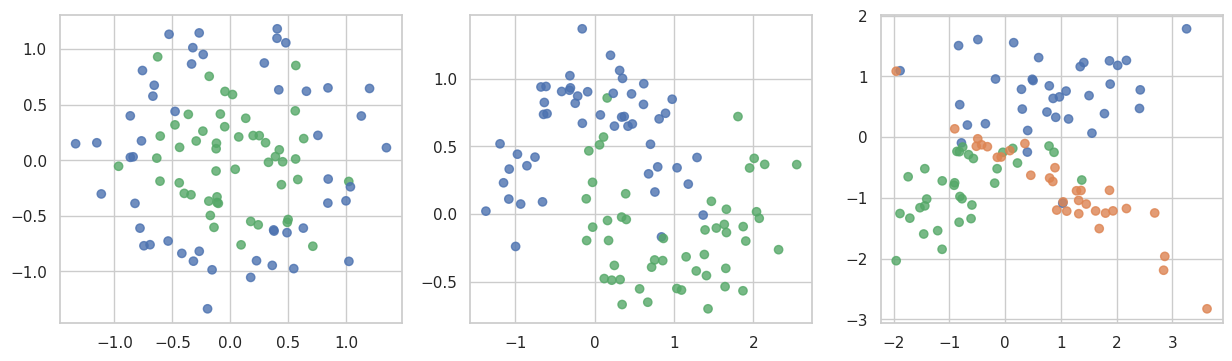

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

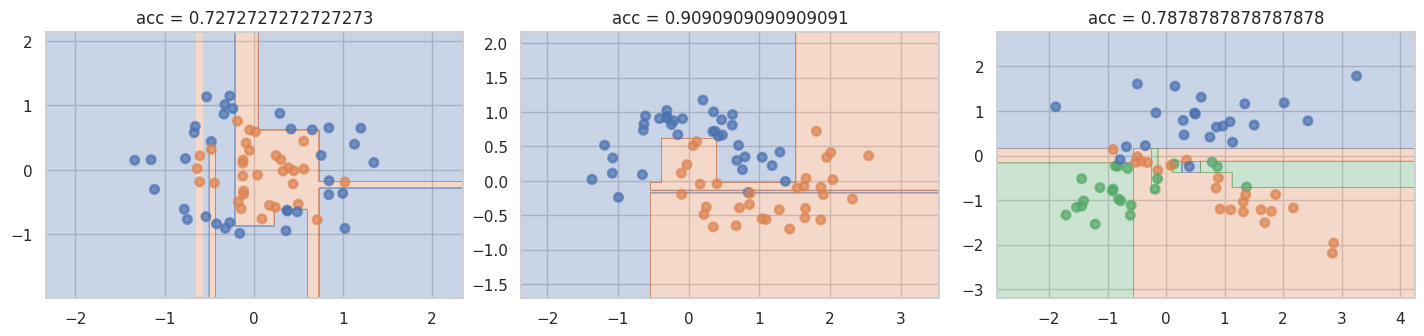

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
plt.figure(figsize=(15, 4))
for i in range(3):
  plt.subplot(1, 3, i + 1)
  X, y = datasets[i]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
  clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
  plot_surface(clf, X_train, y_train)
  plt.title(f'acc = {accuracy_score(clf.predict(X_test), y_test)}')

In [ ]:
# Мы видим маленькие коридорчики и анклавы, которые свидетельствуют о подстройке
# алгоритма под отдельные объекты и, следовательно, переобучении

__Ответ:__ сильно)

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

#### max_depth

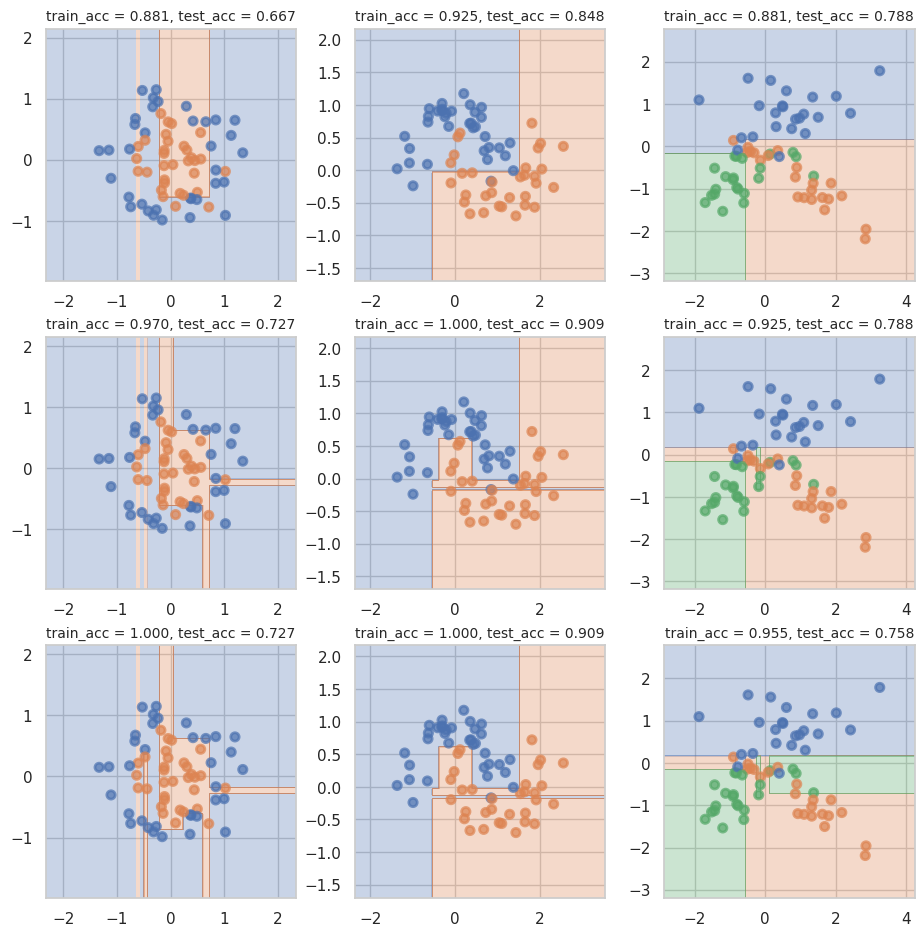

In [ ]:
plt.figure(figsize=(10, 10))
for j, max_d in enumerate([3, 5, 7]):
  for i in range(3):
    plt.subplot(3, 3, 3*j + i + 1)
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    clf = DecisionTreeClassifier(random_state=0, max_depth = max_d).fit(X_train, y_train)
    plot_surface(clf, X_train, y_train)
    acc_train = '%.3f'%accuracy_score(clf.predict(X_train), y_train)
    acc_test = '%.3f'%accuracy_score(clf.predict(X_test), y_test)
    plt.title(f'train_acc = {acc_train}, test_acc = {acc_test}', fontsize = 10)

In [ ]:
# Во всех случаях адекватным картинке значением max_depth является 3, а лучшим с точки зрения accuracy на тесте - 5

#### min samples split

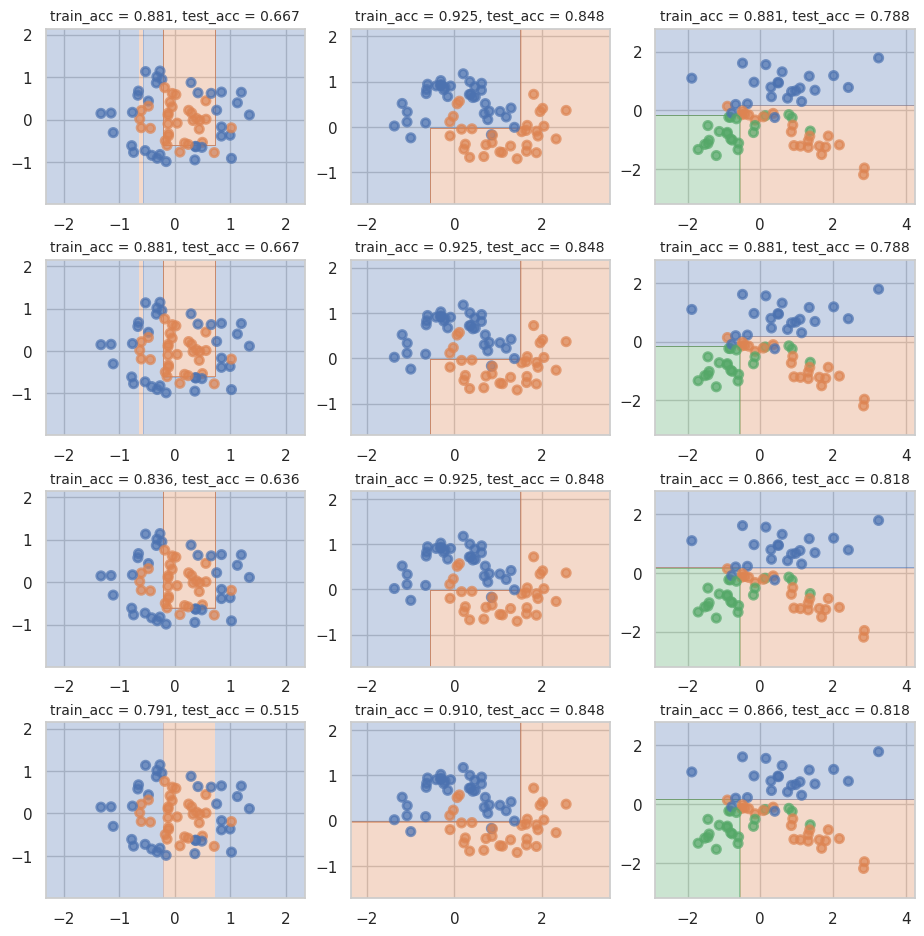

In [ ]:
plt.figure(figsize=(10, 10))
for j, min_ss in enumerate([2, 10, 20, 40]):
  for i in range(3):
    plt.subplot(4, 3, 3*j + i + 1)
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    clf = DecisionTreeClassifier(random_state=0, min_samples_split = min_ss, max_depth = 3).fit(X_train, y_train)
    plot_surface(clf, X_train, y_train)
    acc_train = '%.3f'%accuracy_score(clf.predict(X_train), y_train)
    acc_test = '%.3f'%accuracy_score(clf.predict(X_test), y_test)
    plt.title(f'train_acc = {acc_train}, test_acc = {acc_test}', fontsize = 10)

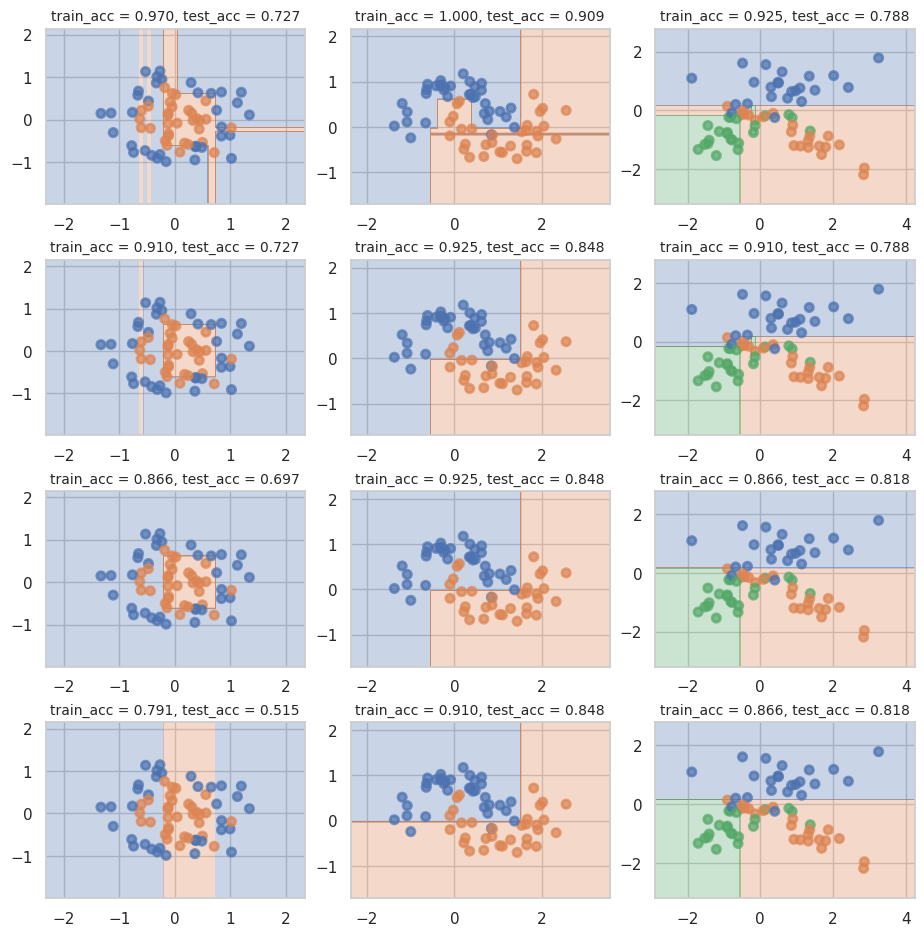

In [ ]:
plt.figure(figsize=(10, 10))
for j, min_ss in enumerate([2, 10, 20, 40]):
  for i in range(3):
    plt.subplot(4, 3, 3*j + i + 1)
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    clf = DecisionTreeClassifier(random_state=0, min_samples_split = min_ss, max_depth = 5).fit(X_train, y_train)
    plot_surface(clf, X_train, y_train)
    acc_train = '%.3f'%accuracy_score(clf.predict(X_train), y_train)
    acc_test = '%.3f'%accuracy_score(clf.predict(X_test), y_test)
    plt.title(f'train_acc = {acc_train}, test_acc = {acc_test}', fontsize = 10)

#### min_samples_leaf


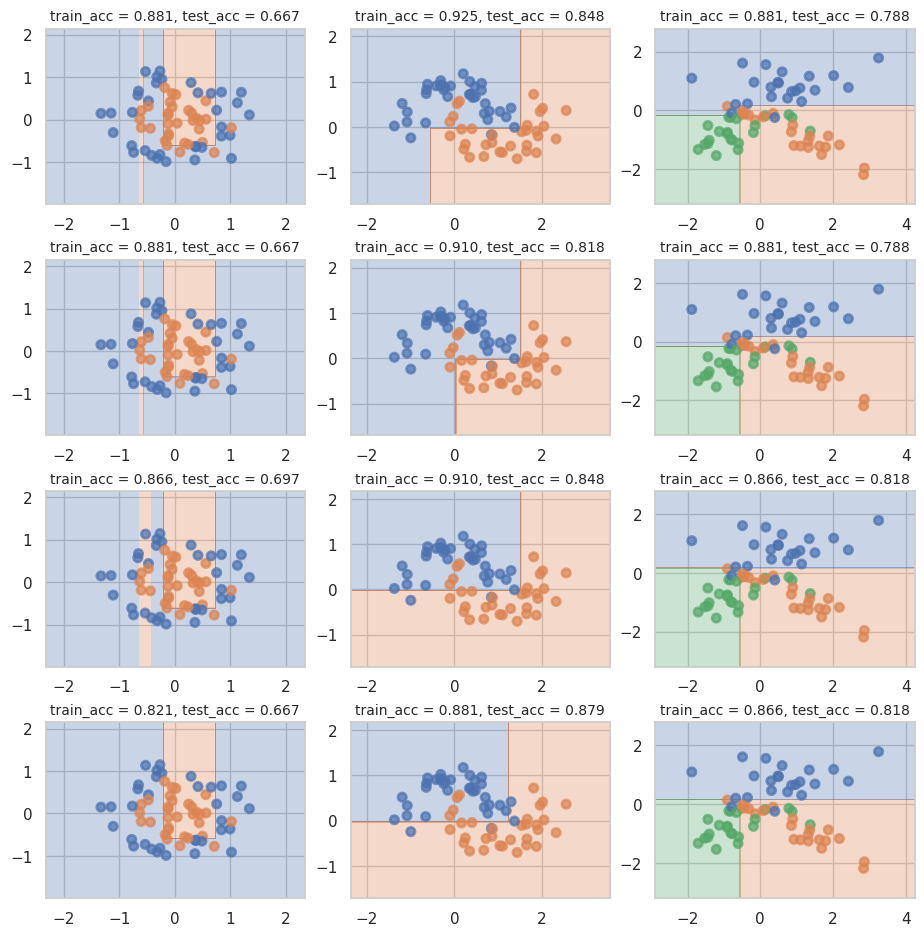

In [ ]:
plt.figure(figsize=(10, 10))
for j, min_sl in enumerate([1, 2, 4, 8]):
  for i in range(3):
    plt.subplot(4, 3, 3*j + i + 1)
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    clf = DecisionTreeClassifier(random_state=0, min_samples_leaf = min_sl, max_depth = 3).fit(X_train, y_train)
    plot_surface(clf, X_train, y_train)
    acc_train = '%.3f'%accuracy_score(clf.predict(X_train), y_train)
    acc_test = '%.3f'%accuracy_score(clf.predict(X_test), y_test)
    plt.title(f'train_acc = {acc_train}, test_acc = {acc_test}', fontsize = 10)

#### Ответ

In [ ]:
# В первой выборке алгоритм находит паттерн при 5  уровнях и 20 min_ss
# Для второй выборки переобучения нет при 3 уровнях и min_samples_leaf = 8
# Для третьей выборки оптимальная настройка - 3 или 5 уровней и 20 или 40 min_ss - тогда плоскость разбивается на три части и переобучения нет

In [ ]:
# Изменение гиперпараметров регулирует подгонку под трейн. Рост max_depth и уменьшение остальных двух ведет к подстройке к отдельным
# объектам и росту качества на трейне вплоть до единицы.
# Паттерн изменения везде одинаковый, а оптимальные значения гиперпараметров - разные

# 2. Решающие деревья своими руками

#### find_best_split

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$

$R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,

$H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

In [ ]:
# def find_best_split(feature_vector, target_vector):

#     ginis = []
#     gini_best = -100000000
#     fv = np.sort(feature_vector)
#     if len(fv) == 1:
#       return fv[0], fv[0], fv[0], 0 ########
#     thresholds = sorted(list(set((fv[1:] + fv[:-1]) / 2)))
#     # thresholds = [i for i in thresholds if i not in fv]

#     threshold_best = thresholds[0]
#     for t in thresholds:
#       Rl = len(feature_vector[np.where(feature_vector < t)])
#       Rr = len(feature_vector[np.where(feature_vector > t)])
#       R = len(feature_vector)
#       Hl = 1 - ((np.sum(target_vector[np.where(feature_vector < t)] == 0)) / Rl)**2 - ((np.sum(target_vector[np.where(feature_vector < t)] == 1)) / Rl)**2
#       Hr = 1 - ((np.sum(target_vector[np.where(feature_vector > t)] == 0)) / Rr)**2 - ((np.sum(target_vector[np.where(feature_vector > t)] == 1)) / Rr)**2
#       gini = - Rl * Hl / R - Rr * Hr / R
#       ginis.append(gini)
#       if gini > gini_best:
#         threshold_best = t
#         gini_best = gini


#     return thresholds, ginis, threshold_best, gini_best

Переписал без цикла

https://contest.yandex.ru/contest/56884/run-report/102661304/

In [ ]:
def find_best_split(feature_vector, target_vector):
    target_vector = np.array(target_vector[(feature_vector).argsort()])
    feature_vector = np.array(feature_vector[(feature_vector).argsort()])
    thresholds = feature_vector[1:] / 2 + feature_vector[:-1] / 2
    ok = feature_vector[1:] != feature_vector[:-1]
    thresholds = thresholds[ok]

    n = len(target_vector)
    nl = np.arange(1, n)
    nr = n - nl
    left_share_of_1 = np.cumsum(target_vector)[:-1] / nl
    left_share_of_0 = 1 - left_share_of_1
    right_share_of_1 = np.cumsum(target_vector)[-1] / nr - np.cumsum(target_vector)[:-1] / nr
    right_share_of_0 = 1 - right_share_of_1

    g1 = - nr / n * (1 - right_share_of_1 ** 2 - right_share_of_0 ** 2)
    g2 = - nl / n * (1 - left_share_of_1 ** 2 - left_share_of_0 ** 2)
    ginis = g1 + g2


    ginis = ginis[ok]
    threshold_best = thresholds[np.argmax(ginis)]
    gini_best = ginis[np.argmax(ginis)]

    return thresholds, ginis, threshold_best, gini_best

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
data = pd.read_csv('students.csv')

In [ ]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


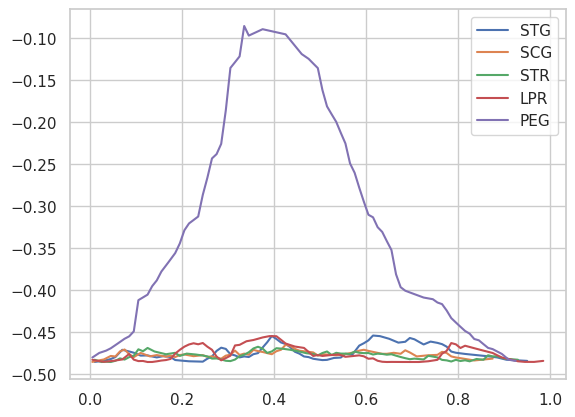

In [ ]:
for i in range(5):
  t, g, t_b, g_b = find_best_split(data.iloc[:, i], data.iloc[:, 5])
  plt.plot(t, g, label = data.columns[i])
plt.legend();

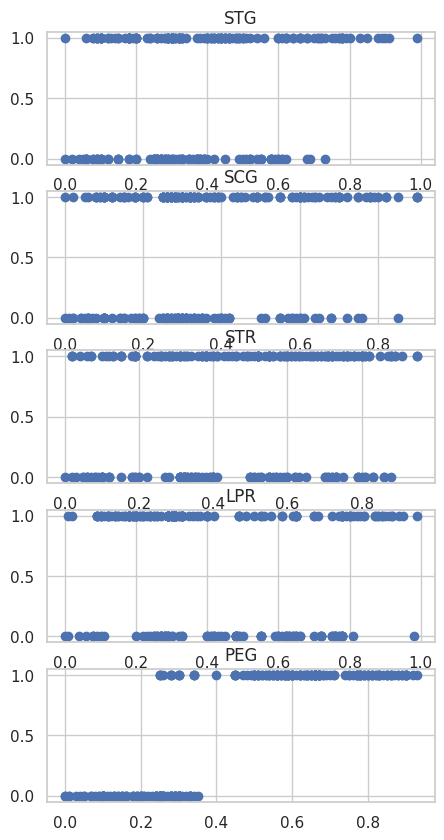

In [ ]:
plt.figure(figsize=(5, 10))
for i in range(5):
    plt.subplot(5, 1, i + 1)
    plt.scatter(data.iloc[:, i], data.iloc[:, 5])
    plt.title(data.columns[i])

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

In [ ]:
# PEG самый информативный - по нему выборка практически идеально делится,
# что следует из обоих графиков. На пике Джини доходит до -0.1 - в то время
# как остальные признаки болтаются на одном и том же значении (что говорит
# о неинформативности)

# Результат согласуется со скаттерами - все признаки кроме пега лежат равномерно,
# а по PEGу можно явно видеть разницу между классами: большинство нулей меньше 0.4,
# большинство единиц - больше

# Хорошие признаки похожи на вогнутые функции - в какой-то момент они должны
# достигать максимума, до которого Джини почти монотонно растет, а после - убывает
# этот максимум соответствует оптимальному сплиту

# У плохих признаков график напоминает линейную функцию Джини = С: для любого сплита
# значение энтропии высокое

#### Класс

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

https://contest.yandex.ru/contest/56884/run-report/102800484/

In [ ]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None,
                 min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical",
                           feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def get_params(self, deep=False):
      dic = {'feature_types': self._feature_types, 'max_depth': self._max_depth, 'min_samples_split': self._min_samples_split, 'min_samples_leaf': self._min_samples_leaf}
      return dic

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]): # если все таргеты равны - это лист
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count  # здесь нужно посчитать долю
                l = range(len(ratio.items()))
                categories_map = dict(zip(sorted(list(ratio.keys()), key=lambda k: ratio[k]), l))

                feature_vector = np.array([
                        categories_map[x] for x in sub_X[:, feature]])
            else:
                raise ValueError

            if np.all(feature_vector == feature_vector[0]):  # если все значения равны
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0], filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] ###
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self.depth += 1
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(
                sub_X[np.logical_not(split)],
                sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if(node['type'] == 'terminal'):
            return node['class']
        else:
            feature_type = self._feature_types[node['feature_split']]
            if(feature_type == 'real'):
                if(x[node['feature_split']] < node['threshold']):
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])
            else:
                if(x[node['feature_split']] in node['categories_split']):
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])


    def fit(self, X, y):
        self.depth = 1
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

In [ ]:
a = np.array([[1, 2, 3], [5, 2, 3], [1, 3, 1]])
b = np.array([0, 1, 1])

In [ ]:
dt = DecisionTree(['categorical' for i in range(3)])
dt.fit(a, b)
с = np.array([[4, 2, 4], [10, 10, 10], [10, 10, 10]])
dt.predict(с)


array([1, 1, 1])

#### Практика

######  __Задание 7. (0.5 балла)__



Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('agaricus-lepiota.data')

enc = LabelEncoder()
y, X = df.iloc[:, 0], df.iloc[:, 1:]
y = enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
dt = DecisionTree(['categorical' for i in range(X_train.shape[1])])

dt.fit(np.array(X_train), np.array(y_train))

print('Train accuracy:', accuracy_score(dt.predict(np.array(X_train)), y_train))

Train accuracy: 1.0


In [ ]:
dt.depth

10

###### __Задание 8. (бонус, 1 балл)__



Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [ ]:
class DecisionTreeNice:
    def __init__(self, feature_types, max_depth=7, min_samples_split=1,
                 min_samples_leaf=1):
        if np.any(list(map(lambda x: x != "real" and x != "categorical",
                           feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def get_params(self, deep=False):
        return {'feature_types': self._feature_types,
               'max_depth': self._max_depth,
               'min_samples_split': self._min_samples_split,
               'min_samples_leaf': self._min_samples_leaf}

    def _fit_node(self, sub_X, sub_y, node):
        self.flq = False
        if np.all(sub_y == sub_y[0]): # если все таргеты равны - это лист
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        if len(sub_y) < self.min_samples_split:
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count  # здесь нужно посчитать долю
                l = range(len(ratio.items()))
                categories_map = dict(zip(sorted(list(ratio.keys()), key=lambda k: ratio[k]), l))

                feature_vector = np.array([
                        categories_map[x] for x in sub_X[:, feature]])
            else:
                raise ValueError

            if np.all(feature_vector == feature_vector[0]):  # если все значения равны
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0], filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None or self.depth == self.max_depth or flq:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] ###
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        if sub_X[split] < min_samples_split or sub_X[np.logical_not(split)] < min_samples_split:
          self.flq = True
        node["left_child"], node["right_child"] = {}, {}
        self.depth += 1
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(
                sub_X[np.logical_not(split)],
                sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if(node['type'] == 'terminal'):
            return node['class']
        else:
            feature_type = self._feature_types[node['feature_split']]
            if(feature_type == 'real'):
                if(x[node['feature_split']] < node['threshold']):
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])
            else:
                if(x[node['feature_split']] in node['categories_split']):
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])


    def fit(self, X, y):
        self.depth = 1
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

###### __Задание 9. (2 балла)__



Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data

ttt = pd.read_csv('tic-tac-toe.data')
cars = pd.read_csv('car.data')
nursery = pd.read_csv('nursery.data')
mush = pd.read_csv('agaricus-lepiota.data')

--2023-12-13 18:21:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘tic-tac-toe.data.2’

tic-tac-toe.data.2      [ <=>                ]  25.26K  --.-KB/s    in 0.05s   

2023-12-13 18:21:55 (519 KB/s) - ‘tic-tac-toe.data.2’ saved [25866]

--2023-12-13 18:21:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘car.data.2’

car.data.2              [ <=>                ]  50.65K  --.-KB/s    in 0.1s    

2023-12-13 18:21:55 (520 KB/s) - ‘car.data.2’ sav

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
dfs = [ttt, cars, nursery]
scores = []
for df in dfs:
  le = LabelEncoder()
  X, y = df.iloc[:, :-1], df.iloc[:, -1]
  y = le.fit_transform(y)
  X = np.array(X)
  dt = DecisionTree(['categorical' for i in range(X.shape[1])])
  scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())

df = mush
le = LabelEncoder()
X, y = df.iloc[:, 1:], df.iloc[:, 0]
y = le.fit_transform(y)
X = np.array(X)
dt = DecisionTree(['categorical' for i in range(X.shape[1])])
scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())
print(scores)

cat = scores

[0.549265350877193, 0.9027221400725903, 0.9108792721292721, 1.0]


In [ ]:
dfs = [ttt, cars, nursery]
scores = []
for df in dfs:
  le = LabelEncoder()
  X, y = df.iloc[:, :-1], df.iloc[:, -1]
  y = le.fit_transform(y)
  dt = DecisionTree(['real' for i in range(X.shape[1])])
  X = X.apply(le.fit_transform)
  X = np.array(X)
  scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())

df = mush
le = LabelEncoder()
X, y = df.iloc[:, 1:], df.iloc[:, 0]
y = le.fit_transform(y)
dt = DecisionTree(['real' for i in range(X.shape[1])])
X = X.apply(le.fit_transform)
X = np.array(X)
scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())
print(scores)

rel = scores

[0.4637390350877193, 0.8818591208495766, 0.9011574074074075, 0.9992610837438424]


In [ ]:
dfs = [ttt, cars, nursery]
scores = []
for df in dfs:
  le = LabelEncoder()
  X, y = df.iloc[:, :-1], df.iloc[:, -1]
  y = le.fit_transform(y)
  X = pd.get_dummies(X)
  X = np.array(X)
  dt = DecisionTree(['real' for i in range(X.shape[1])])
  scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())

df = mush
le = LabelEncoder()
X, y = df.iloc[:, 1:], df.iloc[:, 0]
y = le.fit_transform(y)
X = pd.get_dummies(X)
X = np.array(X)
dt = DecisionTree(['real' for i in range(X.shape[1])])
scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())
print(scores)

dum = scores

[0.5535197368421052, 0.854029439440785, 0.8295524691358025, 0.9996305418719211]


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dfs = [ttt, cars, nursery]
scores = []
for df in dfs:
  X, y = df.iloc[:, :-1], df.iloc[:, -1]
  y = le.fit_transform(y)
  dt = DecisionTreeRegressor()
  X = pd.get_dummies(X)
  X = np.array(X)
  scores.append((cross_val_score(dt, X, y, cv=10, scoring=make_scorer(accuracy_score))).mean())

df = mush
X, y = df.iloc[:, 1:], df.iloc[:, 0]
y = le.fit_transform(y)
dt = DecisionTreeRegressor()
X = pd.get_dummies(X)
X = np.array(X)
scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())
print(scores)

dtr = scores

[0.5649890350877194, 0.8715351525742708, 0.8255401234567902, 1.0]


In [ ]:
dfs1 = [cat, rel, dum, dtr]

In [ ]:
pd.DataFrame(dfs1, columns = ['ttt', 'cars', 'nursery', 'mush'], index = ['cat', 'rel', 'dum', 'dtr'])

,ttt,cars,nursery,mush
cat,0.549265,0.902722,0.910879,1.000000
rel,0.463739,0.881859,0.901157,0.999261
dum,0.553520,0.854029,0.829552,0.999631
dtr,0.564989,0.871535,0.825540,1.000000


In [ ]:
dfs = [ttt, cars, nursery]
scores = []
for df in dfs:
  le = LabelEncoder()
  X, y = df.iloc[:, :-1], df.iloc[:, -1]
  y = le.fit_transform(y)
  X = X.apply(le.fit_transform)
  X = np.array(X)
  dt = DecisionTree(['categorical' for i in range(X.shape[1])])
  scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())

df = mush
le = LabelEncoder()
X, y = df.iloc[:, 1:], df.iloc[:, 0]
y = le.fit_transform(y)
X = X.apply(le.fit_transform)
X = np.array(X)
dt = DecisionTree(['categorical' for i in range(X.shape[1])])
scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())
print(scores)

cat = scores

[0.549265350877193, 0.9027221400725903, 0.9108792721292721, 1.0]


In [ ]:
dfs = [ttt, cars, nursery]
scores = []
for df in dfs:
  le = LabelEncoder()
  X, y = df.iloc[:, :-1], df.iloc[:, -1]
  y = le.fit_transform(y)
  X = X.apply(le.fit_transform)
  X = np.array(X)
  dt = DecisionTree(['real' for i in range(X.shape[1])])
  scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())

df = mush
le = LabelEncoder()
X, y = df.iloc[:, 1:], df.iloc[:, 0]
y = le.fit_transform(y)
X = X.apply(le.fit_transform)
X = np.array(X)
dt = DecisionTree(['real' for i in range(X.shape[1])])
scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())
print(scores)

rel = scores

[0.4637390350877193, 0.8818591208495766, 0.9011574074074075, 0.9992610837438424]


In [ ]:
dfs = [ttt, cars, nursery]
scores = []
for df in dfs:
  le = LabelEncoder()
  X, y = df.iloc[:, :-1], df.iloc[:, -1]
  y = le.fit_transform(y)
  X = X.apply(le.fit_transform)
  X = pd.get_dummies(X)
  X = np.array(X)
  dt = DecisionTree(['real' for i in range(X.shape[1])])
  scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())

df = mush
le = LabelEncoder()
X, y = df.iloc[:, 1:], df.iloc[:, 0]
y = le.fit_transform(y)
X = X.apply(le.fit_transform)
X = pd.get_dummies(X)
X = np.array(X)
dt = DecisionTree(['real' for i in range(X.shape[1])])
scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())
print(scores)

dum = scores

[0.4637390350877193, 0.8818591208495766, 0.9011574074074075, 0.9992610837438424]


In [ ]:
dfs = [ttt, cars, nursery]
scores = []
for df in dfs:
  X, y = df.iloc[:, :-1], df.iloc[:, -1]
  y = le.fit_transform(y)
  dt = DecisionTreeRegressor()
  X = X.apply(le.fit_transform)
  X = np.array(X)
  scores.append((cross_val_score(dt, X, y, cv=10, scoring=make_scorer(accuracy_score))).mean())

df = mush
X, y = df.iloc[:, 1:], df.iloc[:, 0]
y = le.fit_transform(y)
dt = DecisionTreeRegressor()
X = X.apply(le.fit_transform)
X = np.array(X)
scores.append((cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')).mean())
print(scores)

dtr = scores

[0.4700328947368422, 0.8916857104449522, 0.9011574074074075, 0.9992610837438424]


In [ ]:
dfs2 = [cat, rel, dum, dtr]
pd.DataFrame(dfs1, columns = ['ttt', 'cars', 'nursery', 'mush'], index = ['cat', 'rel', 'dum', 'dtr'])

,ttt,cars,nursery,mush
cat,0.549265,0.902722,0.910879,1.000000
rel,0.463739,0.881859,0.901157,0.999261
dum,0.553520,0.854029,0.829552,0.999631
dtr,0.564989,0.871535,0.825540,1.000000


In [ ]:
nursery.head()


,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [ ]:
# Некоторые без LabelEncoder

In [ ]:
pd.DataFrame(dfs2, columns = ['ttt', 'cars', 'nursery', 'mush'], index = ['cat', 'rel', 'dum', 'dtr'])

,ttt,cars,nursery,mush
cat,0.549265,0.902722,0.910879,1.000000
rel,0.463739,0.881859,0.901157,0.999261
dum,0.463739,0.881859,0.901157,0.999261
dtr,0.470033,0.891686,0.901157,0.999261


In [ ]:
# Все с LabelEncoder

###### __Задание 10. (1 балла)__



Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Начнем со сравнения двух табличек: LabelEncoder испоганил результат OHE и обычного дерева: в случае с Tic-Tac-Toe (тк там данные изначально категориальные и не упорядочены), но улучшил результат для cars и nursery: значения признаков там по смыслу (если притянуть за уши) могут быть упорядочены

Категориальный способ во всех случаях (кроме адекватных из первой таблички для tic tac toe, где нам не пришлось использовать LabelEncoder) абсолютно превосходит все остальные.

Это логично, потому что по умолчанию упорядоченность не предполагается, а LabelEncoder работает исходя из такой предпосылки.

При этом лучше всего результат виден на tic tac toe, где никакого порядка и в помине нет. На остальных разница не так заметна, тк там категории в теории можно ранжировать по смыслу

Было бы круто сохранять баланс классов, тк мы смотрим на accuracy:

(array([4208.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3915.]),
 array([11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ]),
 <BarContainer object of 10 artists>)

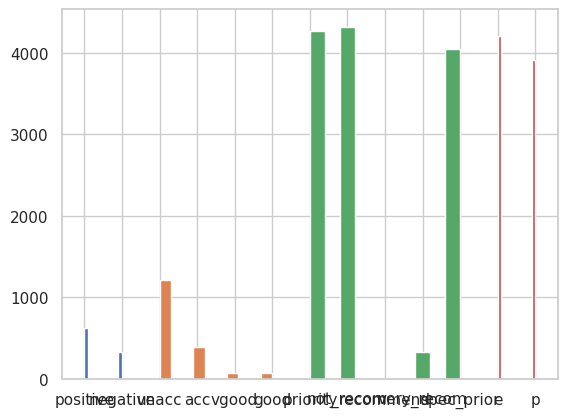

In [ ]:
dfs = [ttt, cars, nursery]
for df in dfs:
  y = df.iloc[:, -1]
  plt.hist(y)
  plt.show;
plt.hist(mush.iloc[:, 0])



Вставьте что угодно, описывающее ваши впечатления от этого задания:

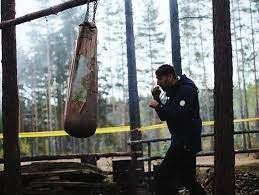